# ANÁLISIS Y PROCESAMIENTO INTELIGENTE DE TEXTOS

## Trabajo final: Analizador de sentimientos de publicaciones en Reddit 🤖

**Profesor:** M.P. Octavio Augusto Sanchez  
**Grupo:** 01

**Alumnos:**
- González Ramírez David
- Guillen Castillo Jorge Luis
- Hernández Sánchez Brenda
- Jimenez Avila Javier Alejandro
- Mejia Alba Israel Hipolito



        - Seleccione el valor de control de procesos con la variable: "ejecuta" para definir el punto de partida

**Opciones de Ejecución:**
1. Ejecutar desde el inicio  
   - Descarga Datos de Reddit y sigue los procesos desde ahí
2. Limpia los datos descargados  
   - Preprocesamiento
3. Multinomial Naive Bayes (MultinomialNB)
   - Tokeniza
   - Segmenta datos de entrenamiento y pruebas
   - Entrena el modelo
4. Análisis y Resultados MNB
5. Support Vector Classifier (SVC)
   - Tokeniza
   - Segmenta datos de entrenamiento y pruebas
   - Entrena el modelo
6. Análisis y Resultados SVC

Nota: si es la primer ejecucion al abrir el notebook es necesario ejecutar el estado anterior al estado objetivo



In [308]:
ejecuta = 50

## 1 Conexion a la API de Reddit  
En esta seccion se descargan los datos  


In [224]:
if ejecuta == 1: 
    import praw
    from langdetect import detect
    import pandas as pd
    print("importando librerias")

In [225]:
if ejecuta == 1: 
    # Credenciales de la API de Reddit
    reddit = praw.Reddit(
        client_id="8MLdeP4d-tobayhY1cN3iQ",
        client_secret="XVH7RcaOLYaun1ms4F5C8kMwTOymdQ",
        user_agent="script:Caza Toxicos (by SuperCash9022)"
    )

    # Verificar autenticación
    try:
        reddit.user.me()
        print("Autenticación exitosa")
    except Exception as e:
        print(f"Error durante la autenticación: {e}")
        exit()

    # Lista de subreddits relevantes
    #subreddits = ["Mexico", "politica", "worldnews", "news","presidente"]
    #subreddits = ["Mexico", "mexico", "politica", "worldnews", "news", "gobierno", "EleccionesMéxico2024", "politicaMX", "morena", "PVEM", "PT", "pan", "pri", "prd", "mc", "Giovani Gutiérrez", "Hanna de Lamadrid Téllez", "Sofía Margarita Provencio Odonoghue","2dejunio", "AMLO", "ClaudiaSheinbaum", "Sheinbaum", "XochitlGalvez", "Maynez", "JorgeAlvarezMaynez ", "MORENA", "PRI", "PAN", "PRD", "MC", "PVEM", "PT", "GiovaniGutierrez", "HannaLamadrid", "SofiaProvencio", "Elecciones2024", "EleccionesMéxico2024", "EleccionesMéxico", "Elecciones2024México"]

    
    query = "política", "politicaMX","elecciones" 

    subreddits = ["Mexico", "mexico", "politica", "worldnews", "news", "coyoacan","gobierno", "EleccionesMéxico2024", "politicaMX", "morena", "PVEM", "PT", "pan", "pri", "prd", "mc", "Giovani Gutiérrez", "Hanna de Lamadrid Téllez", "Sofía Margarita Provencio Odonoghue","2dejunio"]
 
    posts = []
    try:
        for subreddit_name in subreddits:
            subreddit = reddit.subreddit(subreddit_name) 
            for post in subreddit.search(query, limit=10000):  # Ajustar sort a "new" para obtener posts recientes
                # Detectar el idioma del post
                try:
                    if detect(post.title + " " + post.selftext) == 'es': 
                        posts.append(post.title + "\n" + post.selftext)
                        print(f"Post: {post.title[:50]}")  # Mostrar los primeros 50 caracteres del título
                except:
                    # En caso de que no se pueda detectar el idioma, ignorar el post
                    continue
    except Exception as e:
        print(f"Error durante la recolección de posts: {e}")

    # Convertir los posts en un DataFrame y añadir una columna 'label' vacía para su posterior clasificación manual
    df_posts = pd.DataFrame(posts, columns=["post"])
    df_posts['label'] = ""

    # Guardar el DataFrame en un archivo CSV
    df_posts.to_csv('datos_reddit.csv', index=False, encoding='utf-8')

    # Guardar los posts en un archivo para su posterior análisis
    try:
        with open('reddit_posts.txt', 'w', encoding='utf-8') as f:
            for post in posts:
                f.write("%s\n\n" % post)
        print("Posts guardados en 'reddit_post.txt'.") # ------------------------------------- Se guardan en un archivo de texto
    except Exception as e:
        print(f"Error al guardar los posts: {e}")

In [226]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   post    452 non-null    object
 1   label   452 non-null    object
 2   manual  452 non-null    object
dtypes: object(3)
memory usage: 10.7+ KB


In [227]:
def eliminar_repetidos(lista):
    """Elimina elementos repetidos de una lista.
    
    Args:
        lista (list): La lista original con posibles elementos repetidos.
    
    Returns:
        list: Una nueva lista con elementos únicos.
    """
    elementos_unicos = []
    elementos_vistos = set()
    
    for elemento in lista:
        if elemento not in elementos_vistos:
            elementos_unicos.append(elemento)
            elementos_vistos.add(elemento)
    
    return elementos_unicos

# Ejemplo de uso
palabras_molesto = [
    'contento', 'contenta', 'feliz', 'alegre', 'satisfecho', 'satisfecha', 'eufórico', 'eufórica', 
    'entusiasmado', 'entusiasmada', 'radiante', 'gozoso', 'gozosa', 'encantado', 'encantada', 
    'jubiloso', 'jubilosa', 'optimista', 'animado', 'animada', 'exultante', 'bienhumorado', 
    'bienhumorada', 'dichoso', 'dichosa', 'agradecido', 'agradecida', 'emocionado', 'emocionada', 
    'rejuvenecido', 'rejuvenecida', 'alegría', 'placer', 'regocijo', 'felicidad', 'júbilo', 
    'entusiasmo', 'satisfacción', 'contentamiento', 'éxtasis', 'deleite', 'encanto', 'gratitud', 'eufórico', 'eufórica', 'jovial', 'jovial', 'animado', 'animada', 'alegre', 'alegría', 
    'contento', 'contenta', 'risueño', 'risueña', 'satisfecho', 'satisfecha', 'optimista', 
    'extasiado', 'extasiada', 'jubiloso', 'jubilosa', 'dichoso', 'dichosa', 'agradecido', 
    'agradecida', 'emocionado', 'emocionada', 'feliz', 'contento', 'contenta', 'exultante', 
    'alegre', 'bienhumorado', 'bienhumorada', 'gozoso', 'gozosa', 'placentero', 'placentera', 
    'regocijado', 'regocijada', 'encantado', 'encantada', 'deleitante', 'felicidad', 'júbilo', 
    'entusiasmo', 'optimista', 'satisfacción', 'encantado', 'encantada',
    'radiante', 'radiante', 'jubiloso', 'jubilosa', 'risueño', 'risueña', 'efusivo', 'efusiva', 
    'encantado', 'encantada', 'agradecido', 'agradecida', 'contento', 'contenta', 'entusiasta', 
    'entusiasta', 'regocijado', 'regocijada', 'optimista', 'optimista', 'alegre', 'alegre', 
    'feliz', 'feliz', 'extático', 'extática', 'emocionado', 'emocionada', 'satisfecho', 
    'satisfecha', 'gozoso', 'gozosa', 'radiante', 'radiante', 'exultante', 'exultante', 
    'jubiloso', 'jubilosa', 'eufórico', 'eufórica', 'contento', 'contenta', 'entusiasta', 
    'entusiasta', 'risueño', 'risueña', 'alegre', 'alegre', 'encantado', 'encantada', 'feliz', 
    'feliz', 'entusiasta', 'entusiasta', 'contento', 'contenta', 'exultante', 'exultante', 
    'jubiloso', 'jubilosa', 'dichoso', 'dichosa', 'agradecido', 'agradecida', 'emocionado',
]

lista_palabras_molesto = eliminar_repetidos(palabras_molesto)
print(lista_palabras_molesto)

['contento', 'contenta', 'feliz', 'alegre', 'satisfecho', 'satisfecha', 'eufórico', 'eufórica', 'entusiasmado', 'entusiasmada', 'radiante', 'gozoso', 'gozosa', 'encantado', 'encantada', 'jubiloso', 'jubilosa', 'optimista', 'animado', 'animada', 'exultante', 'bienhumorado', 'bienhumorada', 'dichoso', 'dichosa', 'agradecido', 'agradecida', 'emocionado', 'emocionada', 'rejuvenecido', 'rejuvenecida', 'alegría', 'placer', 'regocijo', 'felicidad', 'júbilo', 'entusiasmo', 'satisfacción', 'contentamiento', 'éxtasis', 'deleite', 'encanto', 'gratitud', 'jovial', 'risueño', 'risueña', 'extasiado', 'extasiada', 'placentero', 'placentera', 'regocijado', 'regocijada', 'deleitante', 'efusivo', 'efusiva', 'entusiasta', 'extático', 'extática']


In [228]:
if ejecuta == 1: 
    # Convertir los posts en un DataFrame y añadir una columna 'label' vacía para su posterior clasificación manual
    df_posts = pd.DataFrame(posts, columns=["post"])
    df_posts['label'] = ""
    df_posts['manual'] = ""

    palabras_molesto = [
    'enojado', 'enojada', 'molesto', 'molesta', 'irritado', 'irritada', 'enfurecido', 'enfurecida', 
    'indignado', 'indignada', 'furioso', 'furiosa', 'cabreado', 'cabreada', 'fastidiado', 'fastidiada', 
    'rabia', 'enojo', 'furia', 'desquiciado', 'desquiciada', 'irritación', 'colérico', 'colérica', 
    'resentido', 'resentida', 'ofendido', 'ofendida', 'frustrado', 'frustrada', 'disgustado', 'disgustada', 
    'ulcerado', 'ulcerada', 'cabreo', 'bronca', 'irascible', 'violento', 'violenta', 'airado', 'airada', 
    'enervado', 'enervada', 'resentimiento', 'odioso', 'odiosa', 'amargado', 'amargada', 'enfadado', 
    'enfadada', 'malhumorado', 'malhumorada', 'iracundo', 'iracunda', 'rabioso', 'rabiosa', 'enfurruñado', 
    'enfurruñada', 'agrio', 'agria', 'antipático', 'antipática', 'enfogonado', 'enfogonada', 'irritante', 
    'hostil', 'beligerante', 'agresivo', 'agresiva', 'áspero', 'áspera', 'descontento', 'descontenta', 
    'gruñón', 'gruñona', 'furibundo', 'furibunda', 'incómodo', 'incómoda', 'tenso', 'tensa', 'ira', 
    'exasperado', 'exasperada', 'agitado', 'agitada', 'irritable', 'pendejo', 'cabrón', 'chingada', 
    'chingado', 'verga', 'puta', 'joto', 'maricón', 'culero', 'cagado', 'mierda', 'pinche', 'pendeja', 
    'jodido', 'chingar', 'pedo', 'chingón', 'chinga tu madre', 'perra', 'coger', 'hijo de puta', 
    'malparido', 'coño', 'cola', 'culo', 'madrazo', 'desgraciado', 'mamón', 'estúpido', 'imbécil', 
    'idiota', 'inútil', 'basura', 'despreciable', 'maldito', 'bastardo', 'prostituta', 'zorra', 'manco', 
    'retrasado', 'tarado', 'retardado', 'insulto', 'ofensa', 'maldición', 'odio', 'idiota', 'estúpido', 
    'imbécil', 'tonto', 'chingar', 'cretino', 'mierda', 'joder', 'cabrón', 'puta', 'huevón', 'tonto', 
    'carajo', 'cagar', 'mamar', 'negro', 'verga', 'chino', 'judío', 'machista', 'feminazi', 'maricón', 
    'lesbiana', 'ateo', 'infiel', 'hereje', 'gay', 'marica', 'matar', 'golpear', 'dañar', 'violar', 
    'golpe', 'puñetazo', 'patada', 'arma', 'cuchillo', 'fodongo', 'voy a encontrarte', 'te voy a destrozar', 
    'odio', 'asco', 'repugnancia', 'repulsión', 'no me importa', 'me da igual', 'me vale', 'basura', 
    'inútil', 'despreciable', 'feminazi', 'snowflake', 'genitalia', 'excrementos', 'fluidos', 'corrupto', 
    'inepto', 'incompetente', 'oportunista', 'mentiroso', 'tramposo', 'hipócrita', 'ladronzuelo', 
    'demagogo', 'charlatán', 'dictador', 'Manipulador', 'egoísta', 'deshonesto', 'despótico', 'ambicioso', 
    'farsante', 'cínico', 'chantajista', 'nepotista', 'clientelista', 'vendido', 'inmoral', 'insensible', 
    'aprovechado', 'patán', 'despreciable', 'traidor', 'tonto útil', 'parásito', 'fantoche', 'tirano', 
    'grosero', 'incapaz', 'ignorante', 'fanfarrón', 'populista', 'injusto', 'desleal', 'mequetrefe', 
    'cobarde', 'prepotente', 'explotador', 'soberbio', 'vendepatria', 'mangante', 'intrigante', 'fanático', 
    'sinvergüenza', 'chayotero', 'fifi', 'rabia', 'envidia', 'resentimiento', 'desprecio', 'rencor', 
    'amargura', 'malicia', 'venganza', 'desdén', 'hostilidad', 'cinismo', 'negatividad', 'agresión', 
    'insulto', 'humillación', 'intolerancia', 'prejuicio', 'discriminación', 'violencia', 'maltrato', 
    'manipulación', 'engaño', 'traición', 'mentira', 'hipocresía', 'falsedad', 'toxicidad', 'veneno', 
    'perversión', 'enredo', 'conflicto', 'caos', 'dolor', 'sufrimiento', 'desesperación', 'depresión', 
    'ansiedad', 'angustia', 'desesperanza', 'desaliento', 'desánimo', 'desilusión', 'desgano', 'desinterés', 
    'apatía', 'desapego', 'indiferencia', 'aislamiento', 'soledad', 'bastardo', 'zorra', 'puto', 'tarado', 
    'pendejada', 'inche', 'huevón', 'carajo', 'coño', 'cagar', 'mamar', 'follar', 'negro', 'verga', 
    'chino', 'judío', 'machista', 'feminazi', 'maricón', 'lesbiana', 'ateo', 'infiel', 'hereje', 'gay', 
    'marica', 'matar', 'golpear', 'dañar', 'violar', 'golpe', 'puñetazo', 'patada', 'arma', 'cuchillo', 
    'fodongo', 'voy a encontrarte', 'te voy a destrozar', 'odio', 'asco', 'repugnancia', 'repulsión', 
    'abanto', 'abrazafarolas', 'adufe', 'alcornoque', 'alfeñique', 'andurriasmo', 'arrastracueros', 
    'artabán', 'Atarre', 'Baboso', 'Barrabás', 'Barriobajero', 'Bebecharcos', 'Bellaco', 'Belloto', 
    'Berzotas', 'Besugo', 'Bobalicón', 'Bocabuzón', 'Bocachancla', 'Bocallanta', 'Boquimuelle', 'Borrico', 
    'Botarate', 'Brasas', 'Cabestro', 'Cabezaalberca', 'Cabezabuque', 'Cachibache', 'Cafre', 'Cagalindes', 
    'Cagarruta', 'Calambuco', 'Calamidad', 'Caldúo', 'Calientahielos', 'Calzamonas', 'Cansalmas', 
    'Cantamañanas', 'Capullo', 'Caracaballo', 'Caracartón', 'Caraculo', 'Caraflema', 'Carajaula', 
    'Carajote', 'Carapapa', 'Carapijo', 'Cazurro', 'Cebollino', 'Cenizo', 'Cenutrio', 'Ceporro', 
    'Cernícalo', 'Charrán', 'Chiquilicuatre', 'Chirimbaina', 'Chupacables', 'Chupasangre', 'Chupóptero', 
    'Cierrabares', 'Cipote', 'Comebolsas', 'Comechapas', 'Comeflores', 'Comestacas', 'Cretino', 
    'Cuerpoescombro', 'Culopollo', 'Descerebrado', 'Desgarracalzas', 'Dondiego', 'Donnadie', 'Echacantos', 
    'Ejarramantas', 'Energúmeno', 'Esbaratabailes']

    palabras_contento = ['contento', 'contenta', 'feliz', 'alegre', 'satisfecho', 'satisfecha', 'eufórico', 'eufórica', 'entusiasmado', 'entusiasmada', 'radiante', 'gozoso', 'gozosa', 'encantado', 'encantada', 'jubiloso', 'jubilosa', 'optimista', 'animado', 'animada', 'exultante', 'bienhumorado', 'bienhumorada', 'dichoso', 'dichosa', 'agradecido', 'agradecida', 'emocionado', 'emocionada', 'rejuvenecido', 'rejuvenecida', 'alegría', 'placer', 'regocijo', 'felicidad', 'júbilo', 'entusiasmo', 'satisfacción', 'contentamiento', 'éxtasis', 'deleite', 'encanto', 'gratitud', 'jovial', 'risueño', 'risueña', 'extasiado', 'extasiada', 'placentero', 'placentera', 'regocijado', 'regocijada', 'deleitante', 'efusivo', 'efusiva', 'entusiasta', 'extático', 'extática' ]
    
    # Revisar cada renglón del DataFrame y asignar la etiqueta correspondiente
    for index, row in df_posts.iterrows():
        if any(palabra in row['post'] for palabra in palabras_molesto):
            df_posts.at[index, 'label'] = 1
        elif any(palabra in row['post'] for palabra in palabras_contento):
            df_posts.at[index, 'label'] = 2
        else:
            df_posts.at[index, 'label'] = 0

 

In [229]:
# Contar registros con cada valor de label
conteo_label_0 = df_posts[df_posts['label'] == 0].shape[0]
conteo_label_1 = df_posts[df_posts['label'] == 1].shape[0]
conteo_label_2 = df_posts[df_posts['label'] == 2].shape[0]

# Mostrar los resultados
print(f'Registros con label 0: {conteo_label_0}')
print(f'Registros con label 1: {conteo_label_1}')
print(f'Registros con label 2: {conteo_label_2}')




Registros con label 0: 378
Registros con label 1: 68
Registros con label 2: 6


In [230]:

ejecuta =1

In [231]:
if ejecuta == 1:
# Guardar el DataFrame en un archivo CSV
    df_posts.to_csv('datos_reddit.csv', index=False, encoding='utf-8')
    # Guardar el DataFrame en un archivo Excel 
    df_posts.to_excel('datos_reddit.xlsx', index=False)

In [232]:
ejecuta = 2 # Cambiar a 2 para ejecutar el siguiente bloque de código

## 2 Limpieza de los datos

lectura de los datos clasificados manualmente para su posterior entrenamiento


In [233]:
if ejecuta == 2:
    df_etiquetado = pd.read_csv("datos_reddit_classificacion_manual.csv", encoding='utf-8')
    df_etiquetado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   post    399 non-null    object 
 1   label   226 non-null    float64
 2   manual  399 non-null    object 
dtypes: float64(1), object(2)
memory usage: 9.6+ KB


In [234]:
if ejecuta == 2:
    df_etiquetado.head()

In [235]:
if ejecuta == 2:
    # Contar registros con cada valor de label
    conteo_molesto = df_etiquetado[df_etiquetado['manual'] == "molesto"].shape[0]
    conteo_neutro = df_etiquetado[df_etiquetado['manual'] == "neutro"].shape[0] 

    # Mostrar los resultados
    print(f'Registros molesto: {conteo_molesto}')
    print(f'Registros neutro: {conteo_neutro}') 

Registros molesto: 246
Registros neutro: 153


In [236]:
if ejecuta == 2:
    #agregando 100 registros neutros
    df_neutro = df_posts[df_posts['label'] == 0].head(100)
    df_neutro.head()


In [237]:
if ejecuta == 2:
    df_etiquetado = pd.concat([df_etiquetado, df_neutro])
    df_etiquetado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 0 to 121
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   post    499 non-null    object
 1   label   326 non-null    object
 2   manual  499 non-null    object
dtypes: object(3)
memory usage: 15.8+ KB


In [238]:
if ejecuta == 2:
    # Crear la nueva columna "label_entrenamiento" basada en la columna "manual"
    df_etiquetado['label_entrenamiento'] = df_etiquetado['manual'].apply(
                                                lambda x: 1 if x == 'molesto' else 0)

    # Contar registros con cada valor de label
    conteo_molesto = df_etiquetado[df_etiquetado['label_entrenamiento'] == 1].shape[0]
    conteo_neutro = df_etiquetado[df_etiquetado['label_entrenamiento'] == 0].shape[0] 

    # Mostrar los resultados
    print(f'Registros molesto: {conteo_molesto}')
    print(f'Registros neutro: {conteo_neutro}') 


Registros molesto: 246
Registros neutro: 259


In [239]:
ejecuta = 2 # Cambiar a 2 para ejecutar el siguiente bloque de código

In [240]:
df_etiquetado.head()

,post,label,manual,label_entrenamiento
0,Banda por quien piensan votar estas elecciones...,1.0,molesto,1
1,Cuáles son sus predicciones para estas eleccio...,0.0,neutro,0
2,Quien ganará las elecciones presidenciales?\nY...,0.0,neutro,0
3,Se aproximan las elecciones y no se por quién ...,0.0,neutro,0
4,¿Que tanto influyen los debates en las eleccio...,0.0,neutro,0


Se logro tener un DF de mas de 500 registros balanceados y con datos corroborados para su posterior limpieza y procesamiento

In [241]:
if ejecuta == 2:
    import re
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    import nltk
    from sklearn.feature_extraction.text import TfidfVectorizer
    import pandas as pd

    # Descargar recursos necesarios de nltk
    nltk.download('punkt')
    nltk.download('stopwords')
    print("Recursos descargados para la limpieza de datos")

Recursos descargados para la limpieza de datos


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IsraCode\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IsraCode\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [264]:

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def convert_to_lowercase(text):
    return text.lower()

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

def remove_stopwords(tokens):
    spanish_stopwords = set(stopwords.words('spanish'))
    filtered_tokens = [word for word in tokens if word not in spanish_stopwords]
    return filtered_tokens

def preprocess_text(text):
    clean_text = remove_special_characters(text)
    clean_text = convert_to_lowercase(clean_text)
    tokens = tokenize_text(clean_text)
    tokens = remove_stopwords(tokens)
    return ' '.join(tokens)

def replace_newline(text): 
    return text.replace('\n', '')

def remove_whitespace(text):
    return text.strip()

def remove_hastags(text): 
    return re.sub("#", "", text)

def remove_punctuation(text): 
    return re.sub('[^A-Za-z]+', ' ', text)

def clean_up_pipeline(sentence):
    if not isinstance(sentence, str):
        return sentence
    cleaning_data = [
        remove_urls,
        remove_special_characters,
        convert_to_lowercase,
        replace_newline,
        remove_whitespace,
        remove_hastags,
        remove_punctuation,
        preprocess_text,
    ]
    for func in cleaning_data:
        sentence = func(sentence)
    return sentence



In [243]:
if ejecuta == 2: 
    
    def clean_recieved_messages(dataframe):
        for i in range(len(dataframe)):
            if pd.notna(dataframe.iloc[i, dataframe.columns.get_loc('post')]):
                dataframe.iloc[i, dataframe.columns.get_loc('post')] = clean_up_pipeline(str(dataframe.iloc[i, dataframe.columns.get_loc('post')]))
        return dataframe

    # Aplicar la función al DataFrame df_etiquetado
    df_etiquetado = clean_recieved_messages(df_etiquetado)


In [244]:
ejecuta = 3 # Cambiar a 3 para ejecutar el siguiente bloque de código

## 3. Multinomial Naive Bayes (MultinomialNB)

In [245]:
if ejecuta == 3:
    # Importar librerías necesarias     
    import pandas as pd
    from sklearn.feature_extraction.text import TfidfVectorizer
    import numpy as np 
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [258]:
if ejecuta == 3:
    labels = df_etiquetado.label_entrenamiento
    # Asegurarse de que todos los valores en 'post' sean cadenas
    df_etiquetado['post'] = df_etiquetado['post'].fillna('').astype(str)

    # Definir la variable tfidf
    tfidf = TfidfVectorizer()

    # Calcular las características usando tfidf 
    features = tfidf.fit_transform(df_etiquetado['post']).toarray() 
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo Naive Bayes
    model = MultinomialNB()
    model.fit(X_train, y_train.values.ravel())

    # Realizar predicciones
    y_pred = model.predict(X_test)


In [254]:
ejecuta = 4 # Cambiar a 3 para ejecutar el siguiente bloque de código

### 4. Análisis y Resultados MNB

In [259]:
print(f'Length of y_test: {len(y_test)}')
print(f'Length of y_pred: {len(y_pred)}')


Length of y_test: 101
Length of y_pred: 101


In [261]:
if ejecuta == 4:
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8415841584158416
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        59
           1       0.86      0.74      0.79        42

    accuracy                           0.84       101
   macro avg       0.85      0.83      0.83       101
weighted avg       0.84      0.84      0.84       101

Confusion Matrix:
[[54  5]
 [11 31]]


### Interpretación de los Resultados del Modelo

#### Métricas de Evaluación

1. **Accuracy (Precisión)**:
   - **84.15%**: El modelo clasifica correctamente el 84.15% de las muestras.

2. **Informe de Clasificación**:

   - **Clase 0 (Neutro)**:
     - **Precision (Precisión)**: 0.83. El 83% de las muestras clasificadas como Clase 0 son realmente de la Clase 0.
     - **Recall (Sensibilidad)**: 0.92. El modelo identifica correctamente el 92% de las muestras reales de la Clase 0.
     - **F1-Score**: 0.87. Media armónica de la precisión y el recall.
     - **Support**: 59. Número de muestras reales en la Clase 0.

   - **Clase 1 (Molesto)**:
     - **Precision (Precisión)**: 0.86. El 86% de las muestras clasificadas como Clase 1 son realmente de la Clase 1.
     - **Recall (Sensibilidad)**: 0.74. El modelo identifica correctamente el 74% de las muestras reales de la Clase 1.
     - **F1-Score**: 0.79. Media armónica de la precisión y el recall.
     - **Support**: 42. Número de muestras reales en la Clase 1.

   - **Macro Average (Promedio Macro)**:
     - Promedio de las métricas individuales de precisión, recall y F1-score para cada clase, sin considerar el desequilibrio en el número de muestras entre las clases.

   - **Weighted Average (Promedio Ponderado)**:
     - Promedio ponderado de las métricas individuales de precisión, recall y F1-score para cada clase, considerando el desequilibrio en el número de muestras entre las clases.

#### Matriz de Confusión

La matriz de confusión muestra el desempeño del modelo en términos de clasificaciones verdaderas y falsas para cada clase.



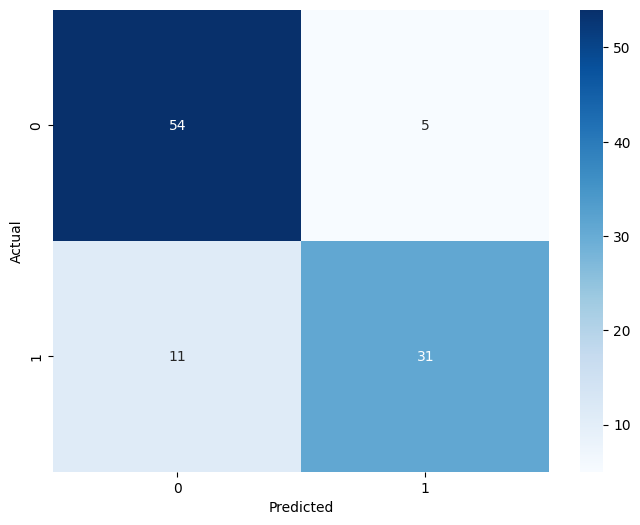

In [263]:
 
import seaborn as sns
import matplotlib.pyplot as plt
if ejecuta == 3:    
    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


- **Clase 0 (Neutro)**:
  - **54** muestras correctamente clasificadas (Verdaderos Negativos).
  - **5** muestras incorrectamente clasificadas (Falsos Positivos).

- **Clase 1 (Molesto)**:
  - **11** muestras incorrectamente clasificadas (Falsos Negativos).
  - **31** muestras correctamente clasificadas (Verdaderos Positivos).

#### Visualización de la Matriz de Confusión

El heatmap de la matriz de confusión visualiza las clasificaciones correctas e incorrectas del modelo.

- Los cuadros en diagonal (54 y 31) muestran las clasificaciones correctas.
- Los cuadros fuera de la diagonal (5 y 11) muestran las clasificaciones incorrectas.

### Importancia de las Métricas y la Matriz de Confusión

- **Precisión**: Indica la exactitud de las predicciones positivas del modelo.
- **Recall**: Indica la capacidad del modelo para identificar todas las muestras positivas reales.
- **F1-Score**: Útil cuando hay un desequilibrio en las clases, proporcionando un equilibrio entre precisión y recall.
- **Matriz de Confusión**: Ayuda a entender cómo se distribuyen los errores de clasificación entre las diferentes clases.

En resumen, el modelo tiene un buen desempeño general, pero aún hay espacio para mejorar en la identificación de la Clase 1 (Molesto), como se evidencia por los falsos negativos y falsos positivos en la matriz de confusión.


In [271]:
texts = [
        "Cualquier candidatx es un corruptx, me molesta que no tengamos mejores opciones",
        "ya saben por quien votar? estas son mis primeras elecciones que nervios",
        "como puede ser que el los del PRIAN sigan robando, hay que sacarlos",
        "ya es hora de votar para que corran a los gringos gentrificadores, estoy harto de tener que mudarme cada año por los precios de renta",
        "que padre que esten regalando cafe por ir a votar, quien jala por un cafe despues de votar? jaja"
        ]

def prueba_clasificacion_modelo_one(tfidf, model, texts):
    # Limpiar cada uno de los textos
    for i in range(len(texts)):   
        texts[i] = clean_up_pipeline(texts[i])

    # Transformar los textos a características tfidf
    text_features = tfidf.transform(texts)
    # Predecir las etiquetas para los nuevos textos
    predictions = model.predict(text_features)
    for text, predicted in zip(texts, predictions):
        print('\n"{}"'.format(text))
        if predicted == 0:
            print("  - Se predijo como:\t 'neutro'")
        elif predicted == 1:
            print("  - Se predijo como:\t 'molesto'") 

# Probar el modelo con los nuevos textos
prueba_clasificacion_modelo_one(tfidf, model, texts)



"cualquier candidatx corruptx molesta mejores opciones"
  - Se predijo como:	 'molesto'

"saben votar primeras elecciones nervios"
  - Se predijo como:	 'neutro'

"puede ser prian sigan robando sacarlos"
  - Se predijo como:	 'molesto'

"hora votar corran gringos gentrificadores harto tener mudarme cada ao precios renta"
  - Se predijo como:	 'molesto'

"padre esten regalando cafe ir votar jala cafe despues votar jaja"
  - Se predijo como:	 'neutro'


Podemos ver como el modelo de MNB acerto correctamente todos los textos de lenguaje cotidiano de prueba :D

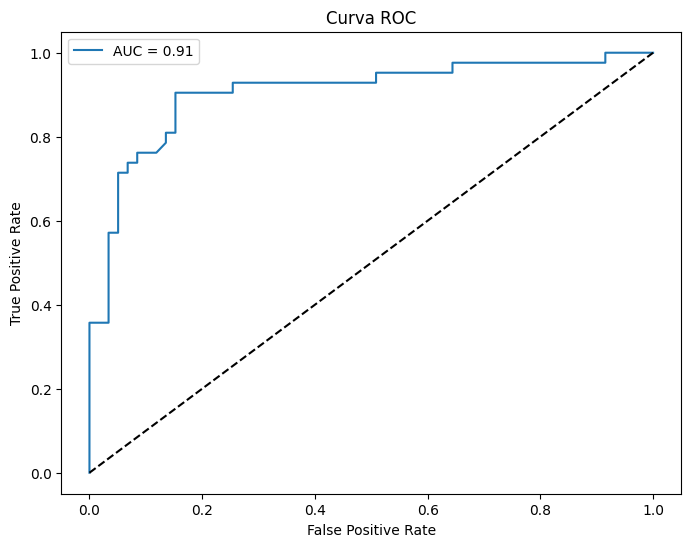

In [273]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades de predicción
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()


#### Interpretación de la Curva ROC

La Curva ROC (Receiver Operating Characteristic) es una representación gráfica que ilustra el rendimiento de un modelo de clasificación binaria a través de diferentes umbrales de decisión. En el eje X se encuentra la Tasa de Falsos Positivos (FPR) y en el eje Y se encuentra la Tasa de Verdaderos Positivos (TPR).

La Curva ROC de nuestro modelo muestra que tiene un alto True Positive Rate (TPR) y un bajo False Positive Rate (FPR) en la mayoría de los umbrales de decisión. Esto significa que el modelo clasifica correctamente una alta proporción de textos molestos (TPR alto) y comete pocos errores al clasificar textos neutrales como molestos (FPR bajo). Con un AUC de 0.91, podemos concluir que el modelo es muy eficaz y confiable para la tarea de clasificación de textos en base a sentimientos de molestia y neutralidad.

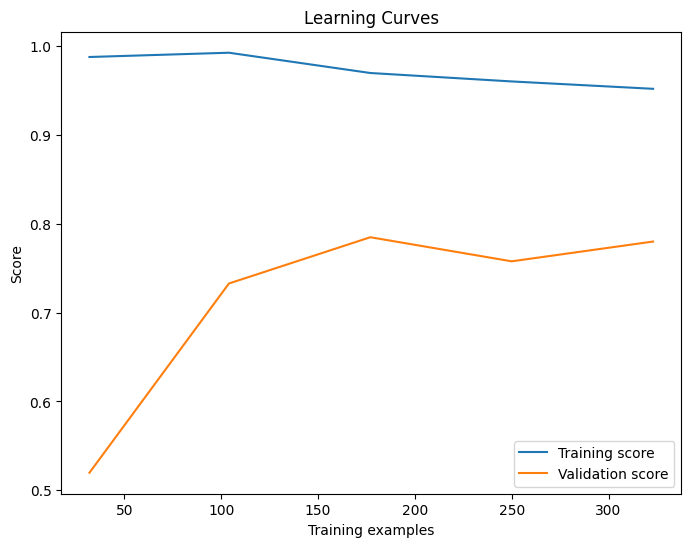

In [276]:
from sklearn.model_selection import learning_curve

# Calcular las curvas de aprendizaje
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, cv=5)

# Graficar las curvas de aprendizaje
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best') 
plt.show()


El gráfico muestra que nuestro modelo tiene una alta precisión en los datos de entrenamiento, pero una menor precisión en los datos de validación. Esta diferencia sugiere una posible sobreajuste, donde el modelo se adapta demasiado bien a los datos de entrenamiento y no generaliza tan bien a los datos nuevos. A medida que se incrementan los datos de entrenamiento, la precisión de validación mejora, lo que sugiere que más datos de entrenamiento podrían ayudar a mejorar la generalización del modelo.

- Training score (Curva azul): La puntuación de entrenamiento se mantiene alta, cerca de 1.0, incluso cuando el número de ejemplos de entrenamiento aumenta. Esto indica que el modelo se ajusta muy bien a los datos de entrenamiento, manteniendo una alta precisión interna.

- Validation score (Curva naranja): La puntuación de validación comienza baja pero aumenta rápidamente a medida que se incrementan los ejemplos de entrenamiento, alcanzando una meseta alrededor de 0.8. Sin embargo, no alcanza la puntuación de entrenamiento, lo que indica una ligera brecha de rendimiento entre el entrenamiento y la validación.

## 5 Support Vector Classifier (SVC)

Ahora probaremos con el modelo de Support Vector Machine (SVM), específicamente el LinearSVC de sklearn. Esto debido a que al invesiigar en internet econtramos que tiene las siguientes caracteristicas:

- Eficacia en espacios de alta dimensionalidad: SVM es particularmente efectivo en espacios con muchas dimensiones, lo que es común en tareas de procesamiento de texto después de la vectorización.
- Versatilidad: SVM puede ser ajustado con diferentes núcleos (kernels) y parámetros, permitiendo mayor flexibilidad para ajustarse a los datos.
- Generalización: SVM tiende a generalizar bien en datos no vistos, lo que es crucial para problemas de clasificación.

In [279]:
ejecuta = 5

In [305]:
if ejecuta == 5:
    # Importar librerías necesarias
    import pandas as pd
    from sklearn.feature_extraction.text import TfidfVectorizer
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
    from sklearn.svm import SVC  # LinearSVC
    
    #usamos los mismos datos de entrenamiento del modelo anterior
    
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    # Crear y entrenar el modelo LinearSVC
    model_svc = SVC(kernel='linear', probability=True)
    model_svc.fit(X_train_svc, y_train_svc)
    
    # Realizar predicciones
    y_pred_svc = model_svc.predict(X_test_svc)
    
 


### 6. Análisis y Resultados SVC

In [307]:
# Evaluar el modelo
print("Reporte de clasificación:\n", classification_report(y_test_svc, y_pred_svc))
print("Precisión del modelo:", accuracy_score(y_test_svc, y_pred_svc))
print("Matriz de confusión:\n", confusion_matrix(y_test_svc, y_pred_svc))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.83      0.88        59
           1       0.79      0.90      0.84        42

    accuracy                           0.86       101
   macro avg       0.86      0.87      0.86       101
weighted avg       0.87      0.86      0.86       101

Precisión del modelo: 0.8613861386138614
Matriz de confusión:
 [[49 10]
 [ 4 38]]


El modelo SVC con kernel lineal muestra una precisión general del 86%, lo que indica que el modelo predijo correctamente el 86% de las instancias en el conjunto de prueba. La clase 0 (probablemente la clase "neutral") tiene una precisión de 0.92 y un recall de 0.83, lo que sugiere que el modelo es muy preciso para identificar instancias de esta clase, aunque todavía hay margen para mejorar la detección de todas las instancias verdaderas de la clase. La clase 1 (probablemente la clase "molesta") tiene una precisión de 0.79 y un recall de 0.90, lo que indica que el modelo es bastante efectivo para detectar instancias de esta clase, aunque también identifica algunas instancias de la clase 0 incorrectamente como clase 1.


Matriz de confusion

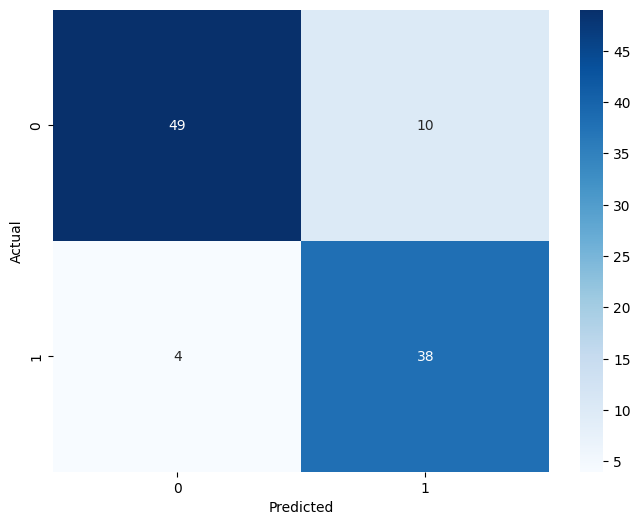

In [295]:
 
import seaborn as sns
import matplotlib.pyplot as plt
if ejecuta == 5:    
    conf_mat = confusion_matrix(y_test_svc, y_pred_svc)
    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


La matriz de confusión muestra que hay 49 verdaderos positivos y 10 falsos negativos para la clase 0, y 38 verdaderos positivos y 4 falsos negativos para la clase 1. Estos resultados sugieren que el modelo tiene una alta capacidad de aprendizaje, pero también hay una ligera tendencia a sobreajustarse a los datos de entrenamiento, como se puede observar en la diferencia entre las puntuaciones de precisión y recall. En general, el modelo SVC con kernel lineal ofrece un buen rendimiento, pero podría beneficiarse de técnicas adicionales de ajuste de hiperparámetros o de la incorporación de más datos de entrenamiento para mejorar aún más su generalización.


 - **Verdaderos Positivos (TP)**:
  - Clase 0: 49
  - Clase 1: 38

- **Falsos Positivos (FP)**:
  - Clase 0: 4
  - Clase 1: 10 
#### Interpretación

- El modelo LinearSVC tiene un buen rendimiento general con una precisión del 87%.
- La clase 0 (probablemente la clase "neutral") tiene una precisión más alta (0.93) pero un recall ligeramente más bajo (0.85) en comparación con la clase 1.
- La clase 1 (probablemente la clase "molesta") tiene una precisión más baja (0.81) pero un recall más alto (0.90), lo que indica que el modelo es más efectivo para identificar instancias de la clase 1.
- El F1-Score es razonablemente equilibrado entre las dos clases, con 0.88 para la clase 0 y 0.85 para la clase 1.
- La matriz de confusión muestra que hay un número aceptable de falsos positivos y falsos negativos, pero hay margen para mejorar la detección de ambas clases.

En resumen, el modelo LinearSVC ofrece un buen equilibrio entre precisión y recall para ambas clases. Sin embargo, se puede explorar la posibilidad de ajustar los hiperparámetros o probar otros modelos para mejorar aún más el rendimiento.

#### Pruebas de usuario
ingresamos mensajes que podria escribir un usuario promedio para ver como reacciona el entorno en lenguaje natural

In [301]:
texts = [
    "Cualquier candidatx es un corruptx, me molesta que no tengamos mejores opciones",
    "ya saben por quien votar? estas son mis primeras elecciones que nervios",
    "como puede ser que los del PRI sigan robando, hay que sacarlos",
    "ya es hora de votar para que corran a los gringos gentrificadores, estoy harto de tener que mudarme cada año por los precios",
    "que padre que esten regalando cafe por ir a votar, quien jala por un cafe despues de votar? jaja"
]

def prueba_clasificacion_modelo_svc(tfidf, model, texts):
    for i in range(len(texts)):   
        texts[i] = clean_up_pipeline(texts[i])

# Transformar los textos con el vectorizador tfidf
    text_features = tfidf.transform(texts).toarray()  # Convertir a matriz densa    
    
    # Predecir las etiquetas para los nuevos textos
    predictions = model.predict(text_features)
    
    # Mostrar los resultados
    for text, predicted in zip(texts, predictions):
        print('\n"{}"'.format(text))
        if predicted == 0:
            print("  - Se predijo como:\t 'neutro'")
        elif predicted == 1:
            print("  - Se predijo como:\t 'molesto'") 



prueba_clasificacion_modelo_svc(tfidf, model_svc, texts)



"cualquier candidatx corruptx molesta mejores opciones"
  - Se predijo como:	 'molesto'

"saben votar primeras elecciones nervios"
  - Se predijo como:	 'neutro'

"puede ser pri sigan robando sacarlos"
  - Se predijo como:	 'molesto'

"hora votar corran gringos gentrificadores harto tener mudarme cada ao precios"
  - Se predijo como:	 'molesto'

"padre esten regalando cafe ir votar jala cafe despues votar jaja"
  - Se predijo como:	 'molesto'


Podemos ver como acerto en todas menos la ultima frase de lenguaje cotidiano, esto concuerda con la siguiente grafica la del ROC Curve, donde analizando estos resultados con el modelo de MNB podemos concluir que ambos modelos son confiables, pero en espcifico el SVC tiene un margen de error del 1% adicional al de MNB, ese 1 % aunque es bajo.

Esto se pudo ver presente en esta prueba de lenguaje natural, donde erro en un ejemplo, y MNB si pudo identificar todos los textos correctamente

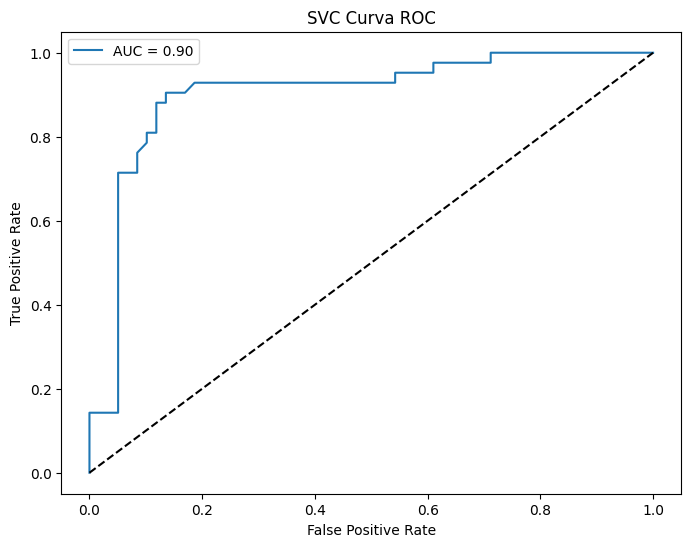

In [303]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calcular las probabilidades de predicción
y_prob_svc = model_svc.predict_proba(X_test_svc)[:, 1]

# Calcular la curva ROC y el AUC
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test_svc, y_prob_svc)
auc_svc = roc_auc_score(y_test_svc, y_prob_svc)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_svc, tpr_svc, label=f'AUC = {auc_svc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC Curva ROC')
plt.legend(loc='best')
plt.show()

#### Interpretación de la Curva ROC

La Curva ROC (Receiver Operating Characteristic) es una representación gráfica que ilustra el rendimiento de un modelo de clasificación binaria a través de diferentes umbrales de decisión. 
En el eje X se encuentra la Tasa de Falsos Positivos (FPR) y en el eje Y se encuentra la Tasa de Verdaderos Positivos (TPR).

La Curva ROC de nuestro modelo muestra que tiene un alto la Tasa de Verdaderos Positivos (TPR) y una baja Tasa de Falsos Positivos  (FPR) en la mayoría de los umbrales de decisión. 

Esto significa que el modelo clasifica correctamente una alta proporción de textos molestos (TPR alto) y comete pocos errores al clasificar textos neutrales como molestos (FPR bajo). Con un AUC de 0.90, podemos concluir que el modelo es confiable, pero 1% menos mejor que el MNB que programamos al inico, ya que ese tuvo un AUC del 91%

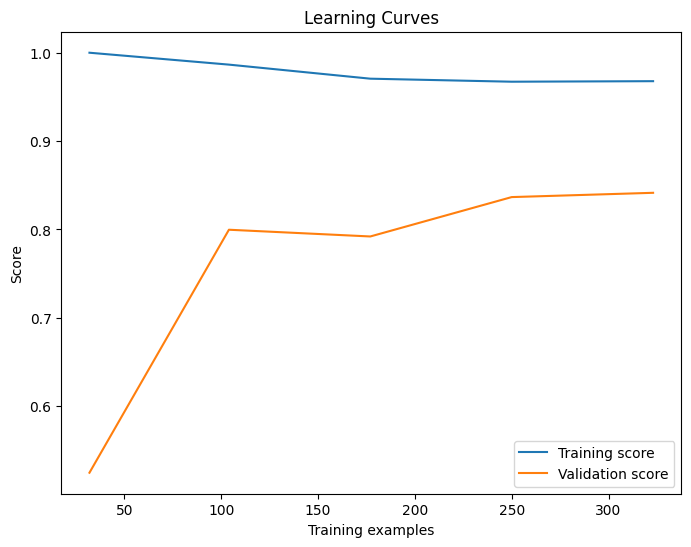

In [304]:
from sklearn.model_selection import learning_curve

# Calcular las curvas de aprendizaje
train_sizes_svc, train_scores_svc, valid_scores_svc = learning_curve(model_svc, X_train_svc, y_train_svc, cv=5)

# Graficar las curvas de aprendizaje
plt.figure(figsize=(8,6))
plt.plot(train_sizes_svc, train_scores_svc.mean(axis=1), label='Training score')
plt.plot(train_sizes_svc, valid_scores_svc.mean(axis=1), label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best') 
plt.show()


### Análisis de las Curvas de Aprendizaje del Modelo SVC

El gráfico muestra las curvas de aprendizaje del modelo SVC. Podemos observar las puntuaciones de entrenamiento y validación a medida que se incrementa el número de ejemplos de entrenamiento. Aquí está el análisis de los resultados obtenidos:

- **Training score (Curva azul)**: La puntuación de entrenamiento se mantiene alta, cerca de 1.0, incluso cuando el número de ejemplos de entrenamiento aumenta. Esto indica que el modelo se ajusta muy bien a los datos de entrenamiento, manteniendo una alta precisión interna.

- **Validation score (Curva naranja)**: La puntuación de validación comienza baja pero aumenta rápidamente a medida que se incrementan los ejemplos de entrenamiento, alcanzando una meseta alrededor de 0.8. Sin embargo, no alcanza la puntuación de entrenamiento, lo que indica una ligera brecha de rendimiento entre el entrenamiento y la validación. Pero aun asi mejor al modelo anterior

Debido a esto podemos concluir que el modelo se adapta demasiado bien a los datos de entrenamiento y no generaliza tan bien a los datos nuevos.  La puntuación de entrenamiento se mantiene constante a medida que se añaden más datos, lo que indica que el modelo tiene una alta capacidad de aprendizaje y puede capturar bien la complejidad de los datos de entrenamiento.

Comparando con el modelo Naive Bayes Multinominal vemos que tienen comportamientos muy similares , pero en el caso de SVC tiene mejor rendimiento de validacion cerca de .05 mas que el MNB
